## Notebooks, Igor Imports, and Plotting

This notebook will contain some basic information about using Jupyter notebooks, matplotlib, and the igor package to plot transport data.

First, there are two types of cells in a notebook. This is a Markdown cell. It contains text. There is a lot of syntax to format these cells. This includes support for LaTex:

$$ i\hbar\frac{\partial}{\partial t}\Psi = \hat{H}\Psi $$

Displaying images is also supported:

<img src="files/test_data/Erwin_Schrodinger_1933.jpg">

And lists:

1. here
2. is 
3. a
4. list

And so on...

The second type of cells are code cells. This is a python notebook, so code cells will be interpretted as python code. To begin, let's import a few useful things.

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
# use %matplotlib notebook for interactive plots here in the notebook
from igor.binarywave import Waves

### Plotting

First, let's just look at a super simple example of plotting using the matplotlib object oriented methods.

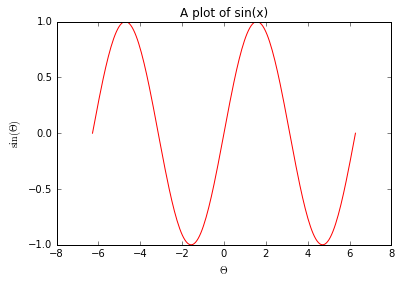

In [2]:
x = np.linspace(-2*np.pi, 2*np.pi, 200)
y = np.sin(x)

fig, ax = plt.subplots(1,1)
ax.plot(x, y, color='r')
ax.set_xlabel('$\Theta$')
ax.set_ylabel('$\sin(\Theta)$')
ax.set_title('A plot of sin(x)')

Similarly, here is a color plot example...

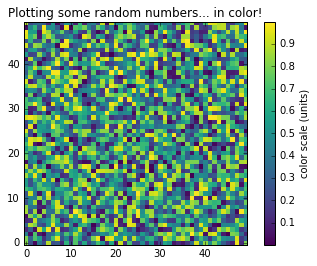

In [3]:
z = np.random.rand(50,50)

fig, ax = plt.subplots(1,1)
im = ax.imshow(z, origin='lower', interpolation='nearest', cmap = plt.cm.viridis)
ax.set_title('Plotting some random numbers... in color!')

cb = plt.colorbar(im)
cb.set_label('color scale (units)')

The best way to learn about matplotlib is probably to steal code from other people. Start here: [Matplotlib Gallery](http://matplotlib.org/gallery.html)

### Igor Imports

A few lines back, I imported a part of the igor package:

    from igor.binarywave import Waves
    
This is a bit of code I added to the igor package to treat binary waves as python objects. Some examples of how to use this are below.

#### 1D waves

In [4]:
w = Waves('test_data/dat17g1x.ibw') # import the wave

# the import function also has some arguments like y_multiplier and transpose, which should be obvious

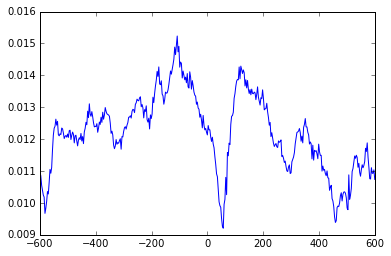

In [5]:
# this object has several useful attributes
# the x and y data are available as numpy arrays: w.x and w.y

fig, ax = plt.subplots(1,1)
ax.plot(w.x, w.y)

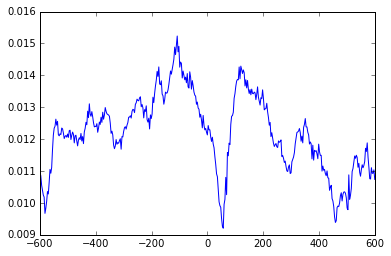

In [6]:
# you can also get both the x and y data as a numpy array
data = w.as_numpyarray()

fig, ax = plt.subplots(1,1)
ax.plot(data[:,0], data[:,1])

#### 2D waves

In [7]:
w = Waves('test_data/dat33g2d1x.ibw', y_multiplier = 1e-7/10e-6/3.75e-5, transpose = True) # import the wave

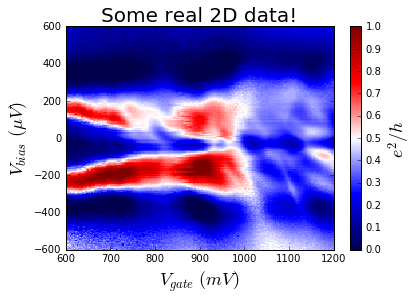

In [8]:
fig, ax = plt.subplots(1,1)
im = ax.imshow(w.y, origin='lower',
               extent=w.extent, cmap = plt.cm.seismic, vmin=0.0, vmax=1.0,
               aspect = 'auto', interpolation='nearest')
ax.set_xlabel('$V_{gate}\ (mV)$', fontsize = 18)
ax.set_ylabel('$V_{bias}\ (\mu V)$', fontsize = 18)
ax.set_title('Some real 2D data!', fontsize = 20)

cb = plt.colorbar(im)
cb.set_label(r'$e^2/h$', fontsize = 18)

In [9]:
# Here I took advantage of another attribute of the Waves object, extent.
# extent gives the x and y bounds of the dataset

print w.extent

[600.0, 1200.0, -600.0, 600.0]


In [10]:
# the x values for this data are a little strange, but are meant to mimic the output of np.meshgrid

print w.x.shape

(201, 201, 2)


Maybe some plots can show how this is setup... I promise it is useful if you want to create 3D plots

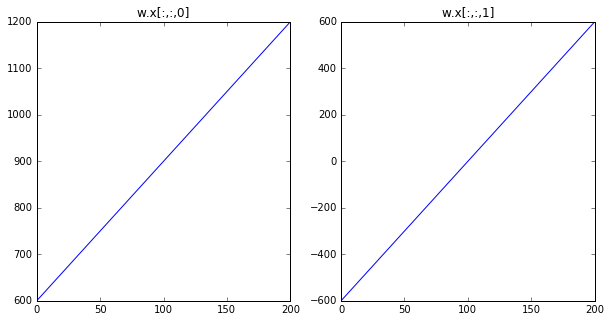

In [11]:
fig, ax = plt.subplots(1,2, figsize = (10,5))
ax[0].plot(w.x[0,:,0]) # all rows are identical
ax[0].set_title('w.x[:,:,0]')
ax[1].plot(w.x[:,0,1]) # all columns are identical
ax[1].set_title('w.x[:,:,1]')

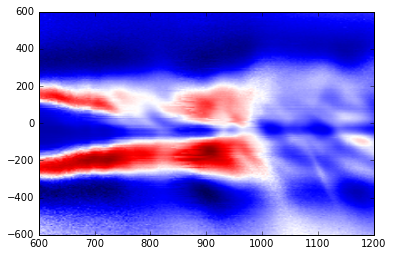

In [20]:
# You can also get a single numpy array holding all of the 2D data

data = w.as_numpyarray()

# the first row and first column hold the data for the x0 and x1 axes
x0 = data[0,1:]
x1 = data[1:,0]
extent = [x0.min(), x0.max(), x1.min(), x1.max()] # same data that already exists in w.extent
y = data[1:,1:] # this is the same data contained in w.y 

fix, ax = plt.subplots(1,1)
ax.imshow(y, origin='lower', cmap = plt.cm.seismic, extent=extent, aspect='auto')

That's it for now! Let me know if there is some specific stuff that could be helpful in here and I will try to add it. 

**Nik Hartman** *(2015)*